filename:  /orange/adamginsburg/jwst/w51//F187N/pipeline/jw06151001001_03101_00001_nrcb1_cal.fits
2.21194 8.991236


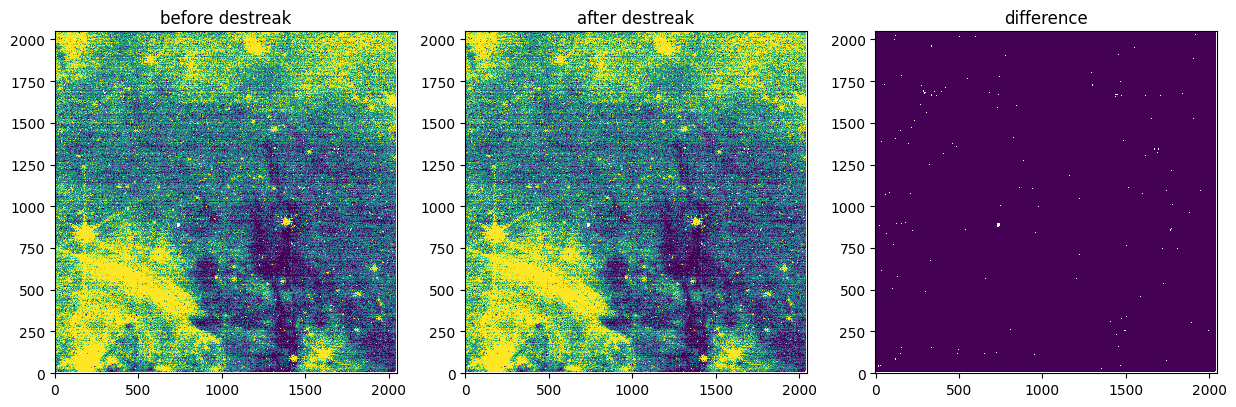

filename:  /orange/adamginsburg/jwst/w51//F187N/pipeline/jw06151001001_03101_00006_nrcb1_cal.fits
4.8339 43.669266


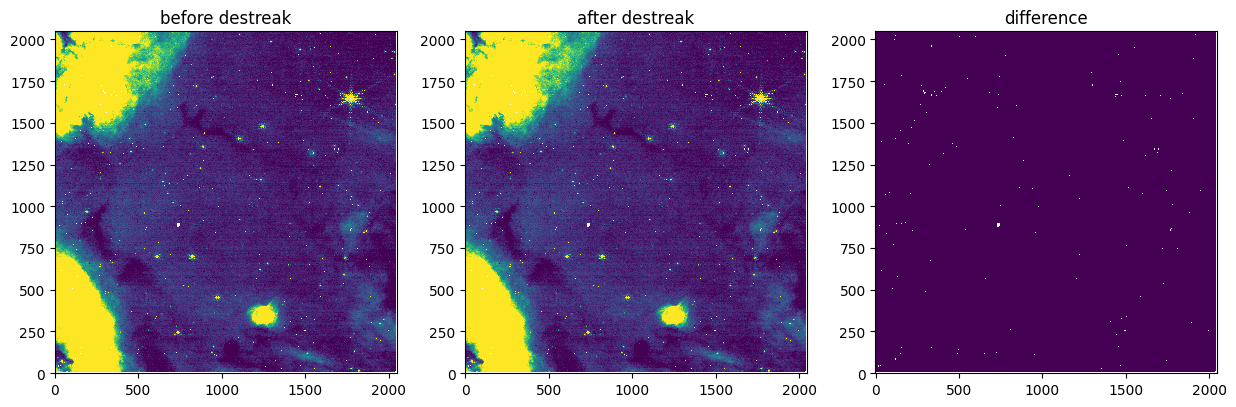

filename:  /orange/adamginsburg/jwst/w51//F187N/pipeline/jw06151001001_03101_00001_nrcb4_cal.fits
4.7068734 96.903595


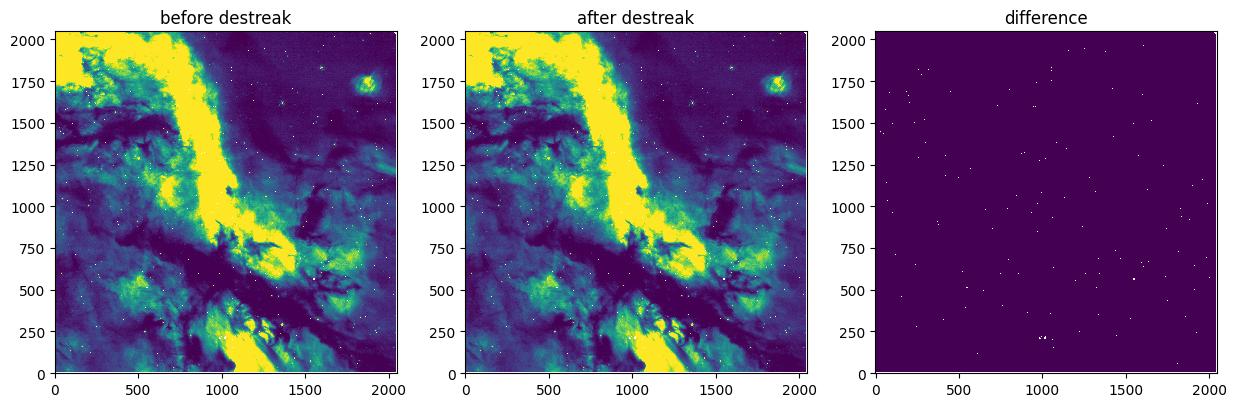

filename:  /orange/adamginsburg/jwst/w51//F187N/pipeline/jw06151001001_03101_00007_nrcb2_cal.fits
4.387973 78.776184


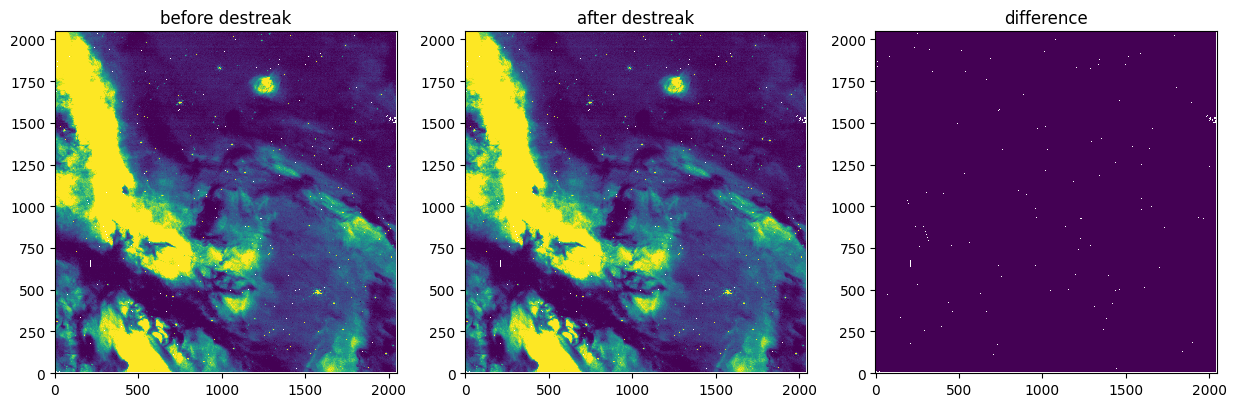

filename:  /orange/adamginsburg/jwst/w51//F187N/pipeline/jw06151001001_03101_00006_nrca2_cal.fits
1.3673059 7.5642037


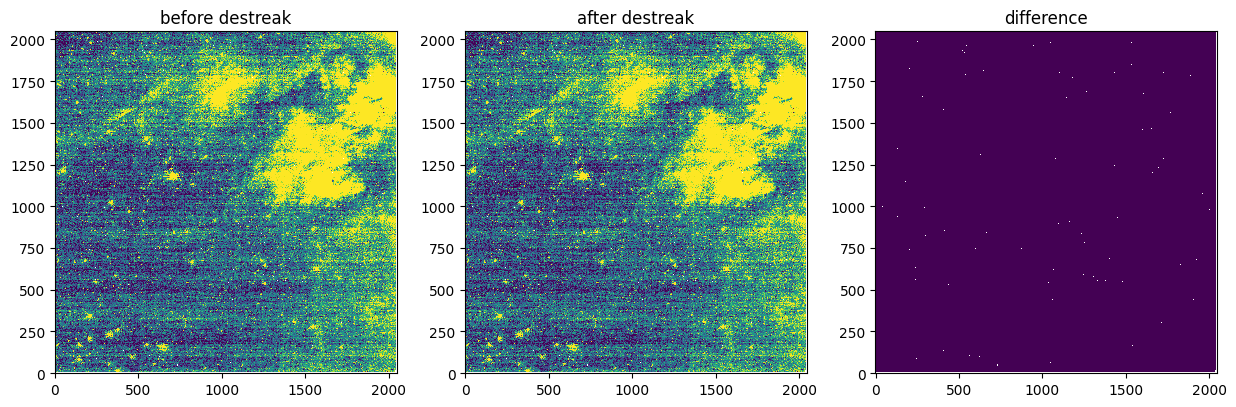

filename:  /orange/adamginsburg/jwst/w51//F187N/pipeline/jw06151001001_03101_00001_nrca4_cal.fits
2.874219 82.579636


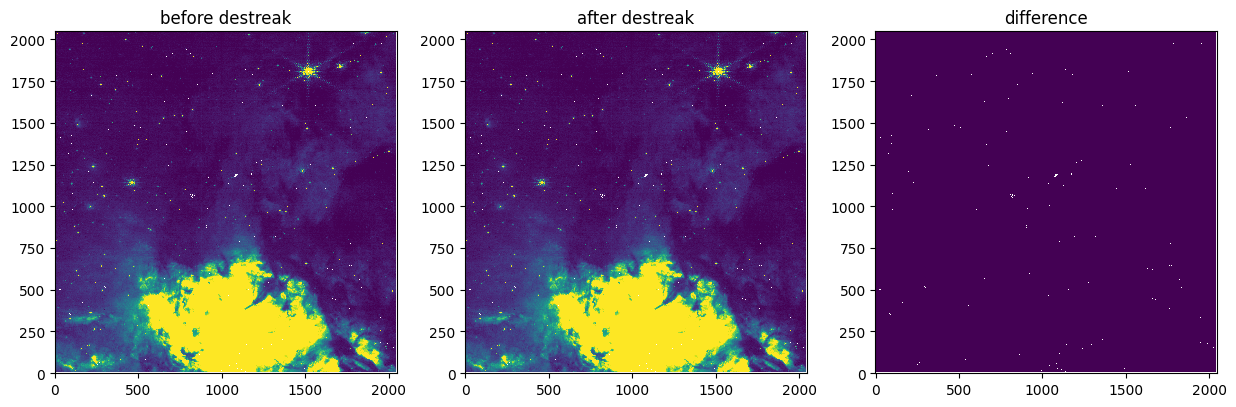

filename:  /orange/adamginsburg/jwst/w51//F187N/pipeline/jw06151001001_03101_00004_nrca4_cal.fits
4.70233 149.36827


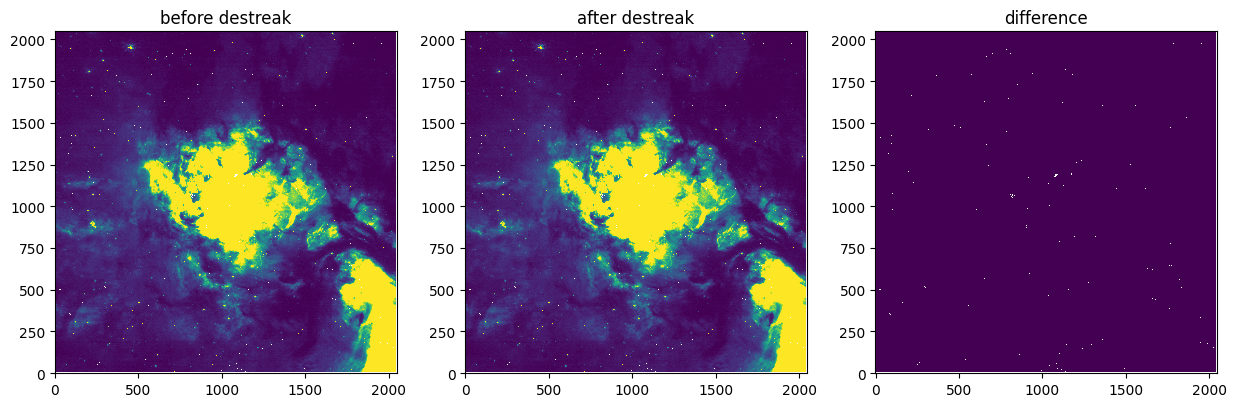

filename:  /orange/adamginsburg/jwst/w51//F187N/pipeline/jw06151001001_03101_00005_nrcb1_cal.fits
4.2496443 43.15042


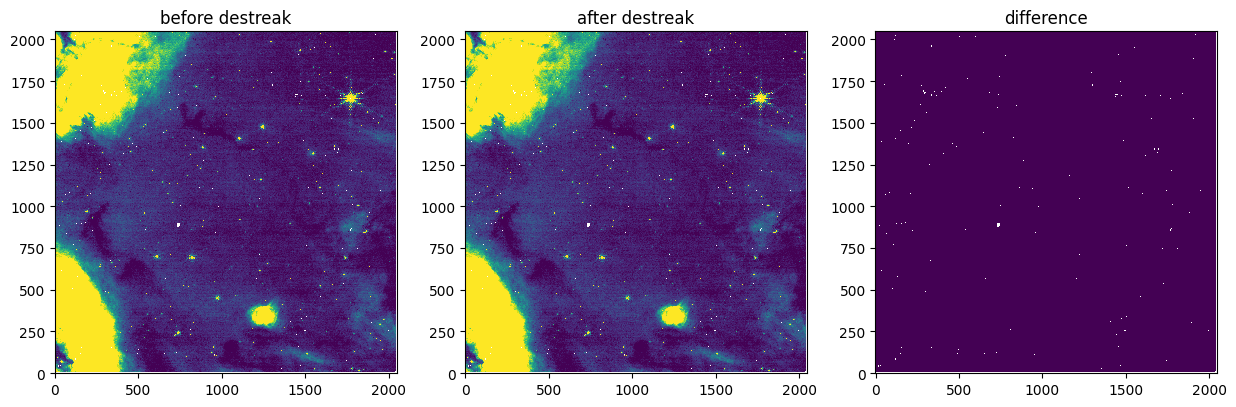

filename:  /orange/adamginsburg/jwst/w51//F187N/pipeline/jw06151001001_03101_00004_nrcb3_cal.fits
5.16176 85.20962


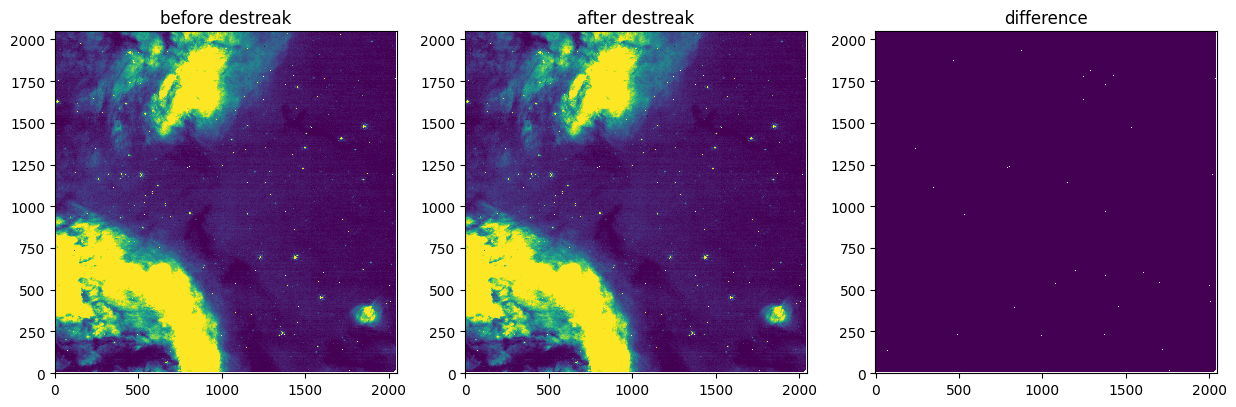

filename:  /orange/adamginsburg/jwst/w51//F187N/pipeline/jw06151001001_03101_00006_nrca3_cal.fits
4.3672185 17.575134


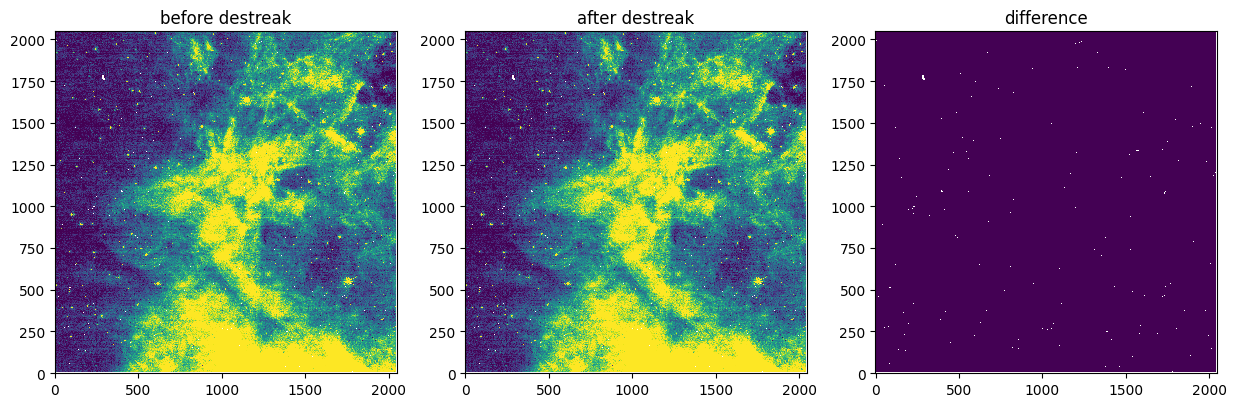

filename:  /orange/adamginsburg/jwst/w51//F187N/pipeline/jw06151001001_03101_00002_nrcb1_cal.fits
2.888692 9.30427


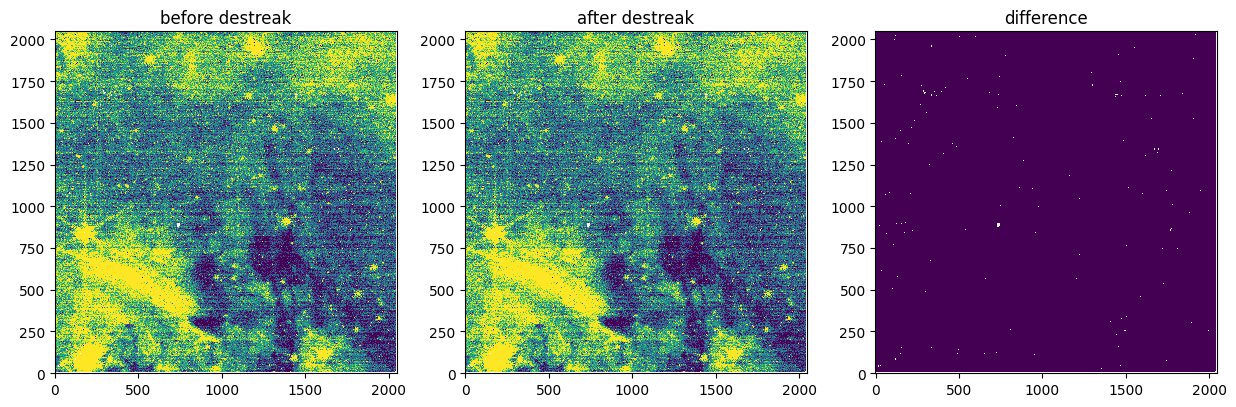

filename:  /orange/adamginsburg/jwst/w51//F187N/pipeline/jw06151001001_03101_00002_nrca2_cal.fits
2.5050564 27.916521


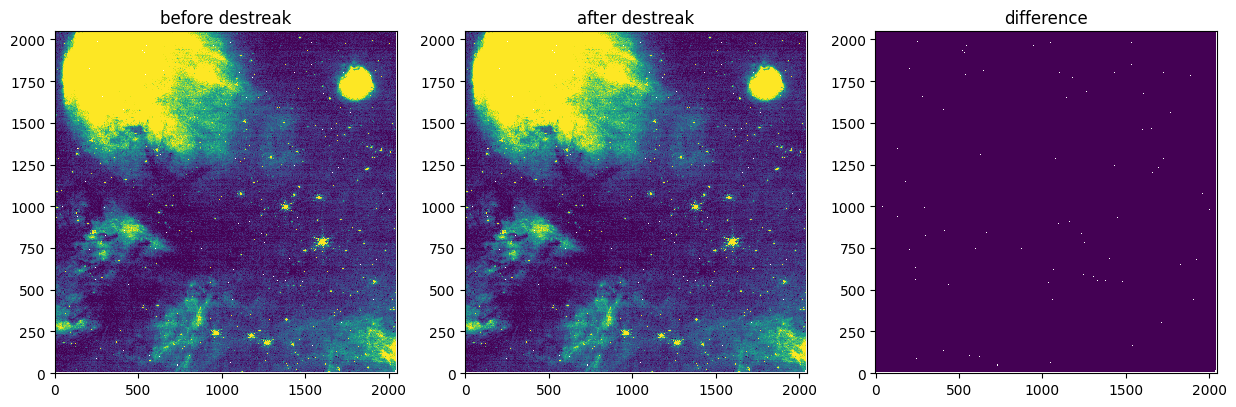

filename:  /orange/adamginsburg/jwst/w51//F187N/pipeline/jw06151001001_03101_00002_nrcb3_cal.fits


KeyboardInterrupt: 

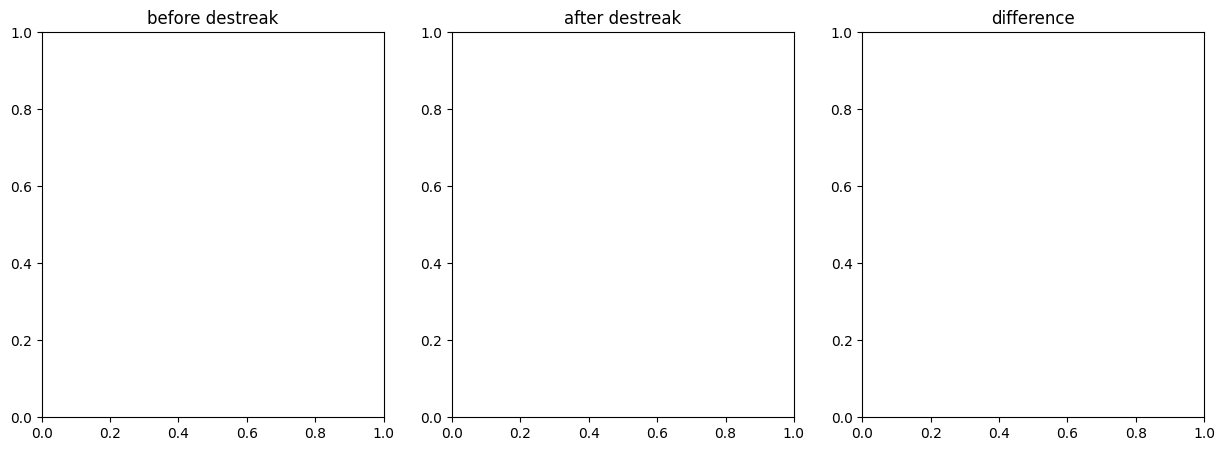

In [4]:
import glob
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
from jwst.datamodels import ImageModel

basepath = '/orange/adamginsburg/jwst/w51/'

filters = ['F140M', 'F150W','F162M','F182M','F187N','F210M','F335M','F360M','F405N','F410M','F480M']
filters= ['F187N']
for filt in filters:
    files = glob.glob(f'{basepath}/{filt}/pipeline/*_cal.fits')
    for file in files:
        print('filename: ',file)

       

        no_destreak = f'{basepath}/{filt}/no_destreak/{file.split("/")[-1]}'
        fig = plt.figure(figsize=(15, 5))
        ax1 = fig.add_subplot(131)
        ax2 = fig.add_subplot(132)
        ax3 = fig.add_subplot(133)

        ax1.set_title('before destreak')
        ax2.set_title('after destreak')
        ax3.set_title('difference')

        minn = 5
        maxx = 90

        cal = ImageModel(file)
        no_destreaked =ImageModel(no_destreak)

        img1 = no_destreaked.data
        img2 = cal.data

        resid = img2 - img1
        print(np.nanpercentile(img1.flatten(), minn), np.nanpercentile(img1.flatten(), maxx))
        ax1.imshow(img1, origin='lower', cmap='viridis', interpolation='nearest', vmin = np.nanpercentile(img1.flatten(), minn), vmax = np.nanpercentile(img1.flatten(), maxx))
        ax2.imshow(img2, origin='lower', cmap='viridis', interpolation='nearest', vmin = np.nanpercentile(img2.flatten(), minn), vmax = np.nanpercentile(img2.flatten(), maxx))
        ax3.imshow(resid, origin='lower', cmap='viridis', interpolation='nearest', vmin = np.nanpercentile(resid.flatten(), minn), vmax = np.nanpercentile(resid.flatten(), maxx))
        plt.show()
        plt.close(fig)